<a href="https://colab.research.google.com/github/bgohrani/FeedForward_Neural_Networks/blob/main/1.FeedForward_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FFNN
Such a model is used for learning where the data is not linearly separable and more compex functions are required to have a proper relation between the input and output. This is acheived by using a network of neurons arranged in different layers. The weights and biases involved in this case are usually much larger but the gradient descent algorithm used remains the same with some modifications. Here we'll first generate non-linearly separable data and compare the output of a sigmoid neuron and a feed-forward network with a given learning algorithm for a binary classigfication. Multi-class classification will follow.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer 

#Importing essential libraries

In [ ]:
#Here we'll import the same sigmoid neuron class we made earlier 
class SigmoidNeuron:
  def __init__(self):
    self.w = None 
    self.b = None
  
  def model(self,x):
    y = 1/(1+np.exp(-(np.dot(self.w,x) + self.b)))
    return y
  
  def predict(self,X):
    Y_pred1 = []
    for x in X:
      y_calc = self.model(x)
      Y_pred1.append(y_calc)
    Y_pred = np.asarray(Y_pred1)
    return Y_pred 
  
  def grad_w(self,x,y):
    gradw = (self.model(x) - y)*(1 - self.model(x))*(self.model(x))*x
    return gradw

  def grad_b(self,x,y):
    gradb = (self.model(x) - y)*(1 - self.model(x))*(self.model(x))
    return gradb
  
  def train(self,X,Y,epochs = 1,lr = 1,initialise =1,show_loss=0):
    Loss=[]
    if initialise ==1:
      self.w = np.random.random([1,X.shape[1]])
      self.b = 0

    for i in tqdm_notebook(range(epochs)):
      dw = 0
      db = 0
      
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db
      loss_1 = 0
      for x,y in zip(X,Y):
        loss_1 += (y - self.model(x))**2
      Loss.append(loss_1)
    if show_loss == 1:
      plt.plot(Loss)
      plt.xlabel('Epochs')
      plt.ylabel('Squared Error Loss')
      plt.show()
    
      
#Here we first use the init function to define self.w and self.b
#The second model function will return the sigmoid func. value for x, w and b
#The grad_w and grad_b functions will help us calculate the gradient for given x and y
#The training function calculates the change in w by summing up gradients throughout X 
#This change is then subtracted from w with a learning rate to minimize loss function and find optimal w and b
#Epochs is the number of times we wish to go through the data 
#We can also choose to initialise w and b if we wish to 
#This model should also work in cases where x in X is a big vector 
#Added loss function to see if w and b are changing correctly 
#Loss is a list that gets appended with loss calculated using the current values of w and b
#We can also get a plot of this loss if needed by the user with a regular if block  
#tqdm is the progress bar package we have used by just adding parantheses with the for loop for epochs

In [ ]:
#Sigmoid Neuron Class with Cross-Entropy Loss

class SigmoidNeuron_CE:
  def __init__(self):
    self.w = None 
    self.b = None
  
  def model(self,x):
    y = 1/(1+np.exp(-(np.dot(self.w,x) + self.b)))
    return y
  
  def predict(self,X):
    Y_pred1 = []
    for x in X:
      y_calc = self.model(x)
      Y_pred1.append(y_calc)
    Y_pred = np.asarray(Y_pred1)
    return Y_pred 
  
  def grad_w(self,x,y):
    gradw = (y - self.model(x))*x
    return gradw

  def grad_b(self,x,y):
    gradb = (y - self.model(x))
    return gradb
  
  def train(self,X,Y,epochs = 1,lr = 1,initialise =1,show_loss=0):
    Loss=[]
    if initialise ==1:
      self.w = np.random.random([1,X.shape[1]])
      self.b = 0

    for i in tqdm_notebook(range(epochs)):
      dw = 0
      db = 0
      
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db
      loss_1 = 0
      for x,y in zip(X,Y):
        loss_1 += ((1 - y)*(math.log((1 - self.model(x)),2)) + (y * math.log(self.model(x)))) * (-1)
      Loss.append(loss_1)
    if show_loss == 1:
      plt.plot(Loss)
      plt.xlabel('Epochs')
      plt.ylabel('Cross-Entropy Loss')
      plt.show()


In [ ]:
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
#Have our own set of colours 

In [ ]:
#We'll first generate non-linearly separable data
#The data is such that the number of samples = 1000
#For each sample there are 2 inputs x1 and x2
#Each sample belongs to 1 of 4 possible categories 
#labels shows the category to which each sample belongs 
#random_state ensures that results are reproducible 

data, labels = make_blobs(n_samples =1000, n_features =2, centers = 4, random_state=0)
print(data.shape , labels.shape)

(1000, 2) (1000,)


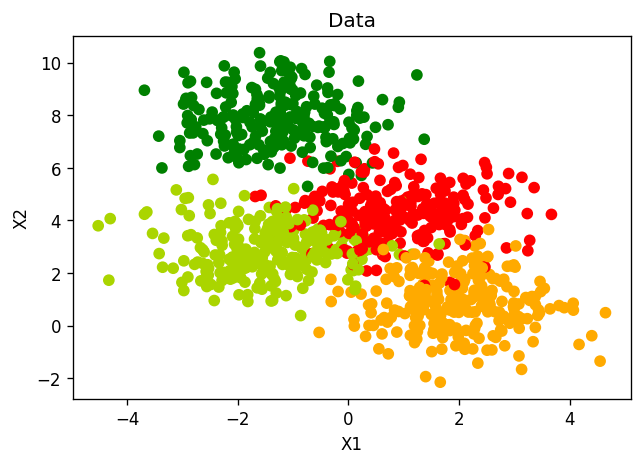

In [ ]:
plt.figure(dpi=120)
plt.scatter(data[:,0],data[:,1],c = labels, cmap = cmap1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data')
plt.show()

In [ ]:
labels_orig = labels
labels = np.mod(labels_orig,2)

#We use this line of code to take the number of classes down to 2 
#We cannot directly use 2 in the centers since the data generated there would be linearly separable 
#Taking remainder with 2 divides the entire data into 2 parts as required 

In [ ]:
labels_orig

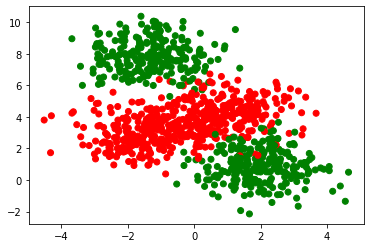

In [ ]:
plt.scatter(data[:,0],data[:,1],c = labels, cmap = cmap1)
plt.show()

#plotting of the given binary data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

#Dividing the data into test and train data as usual

(750, 2) (250, 2) (750,) (250,)


In [ ]:
#We will now train the model with the mean squared error loss 

sigmoid_nuron = SigmoidNeuron()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


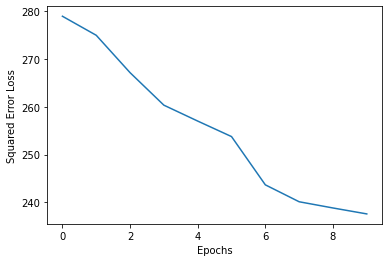

In [ ]:
sigmoid_nuron.train(X_train, Y_train, epochs=10, lr = 0.5, show_loss=1)

In [ ]:
Y_pred_test = sigmoid_nuron.predict(X_test)
Y_pred_train = sigmoid_nuron.predict(X_train)

#We use the trained model to predict the output on X_train and X_test as needed
#We will use this to see the model accuracy


In [ ]:
Y_pred_binarised_test_temp = []
for y in Y_pred_test:
  y_temp = 0 if y < 0.5 else 1
  Y_pred_binarised_test_temp.append(y_temp)
Y_pred_binarised_test = np.asarray(Y_pred_binarised_test_temp)

#Binarising the predicted output for test data or X_test

In [ ]:
Y_pred_binarised_train_temp = []
for y in Y_pred_train:
  y_temp = 0 if y < 0.5 else 1
  Y_pred_binarised_train_temp.append(y_temp)
Y_pred_binarised_train = np.asarray(Y_pred_binarised_train_temp)

#Binarising the predicted output for train data or X_train

In [ ]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_test)
print(accuracy_train, accuracy_test)

#Calculating the accuracy for the predicted and available train and test data 

0.6826666666666666 0.692


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


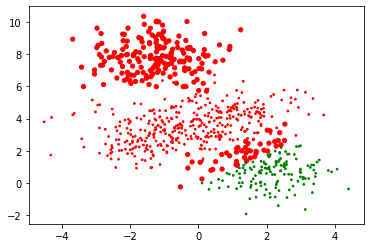

In [ ]:
#We will now try to plot the predicted train data against the available data 
#We will use the difference in the values as the size of the points
#Colours of the points will be as per the predicted data
#scatterplot is used here
#Large size points show incorrect predictions, since data is not linearly separable

plt.scatter(X_train[:,0],X_train[:,1],c= Y_pred_binarised_train,cmap = cmap1, s = 15*((Y_train-Y_pred_binarised_train) + 0.2))
plt.show()

#Our first FeedForward Neural Network
Here we'll write a class for a basic network consisting of 3 neurons, 2 in the first or hidden layer and one in the output layer. These neurons shall be sigmoid neurons, and the input used in this class will be the same as above

In [ ]:
#Class for FF Network

class FFNetwork2:

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def model(self,x):
    return 1.0/(1.0+ np.exp(-x)) 
  
  def forward_pass(self,x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.model(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.model(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.model(self.a3)
    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)

  

  def train(self,X,Y,epochs =1, lr = 1, initialise =1, show_loss = 0):
    if initialise ==1:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    loss = []
    for i in tqdm_notebook(range(epochs)):
      dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3 = [0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[1]
      self.w1 -= lr*dw1/m
      self.w2 -= lr*dw2/m
      self.w3 -= lr*dw3/m
      self.w4 -= lr*dw4/m
      self.w5 -= lr*dw5/m
      self.w6 -= lr*dw6/m
      self.b1 -= lr*db1/m
      self.b2 -= lr*db2/m
      self.b3 -= lr*db3/m

      Y_pred = self.predict(X)
      loss.append(mean_squared_error(Y_pred, Y))
    
    if show_loss ==1:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean squared Error Loss')
      plt.show()
    
  def predict(self,X):
    Y_pred_temp = []

    for x in X:
      y_temp = self.forward_pass(x)
      Y_pred_temp.append(y_temp)

    Y_pred = np.asarray(Y_pred_temp)
    return Y_pred    

#We first have our initialize function which sets all w values as random and b as 0
#A model function returns the sigmoid function value of the given input as usual 
#We then have a forward pass function which takes in the given input and weights 
#This will then give the output of the basic neural network of 3 neurons
#This is followed by a grad function which takes the output of the network
#This then uses the loss function and returns the change in w and b for given x
#We then have the train function which calculates dw for all x 
#This dw is then added to self.w and db is added to self.b
#A loss function is then added and the output, Mean Squared Loss is plotted if needed
#Finally there is a predict function which takes input X and gives the output with trained values

#Using matrix form of equations slows down training speed, direct values are better


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


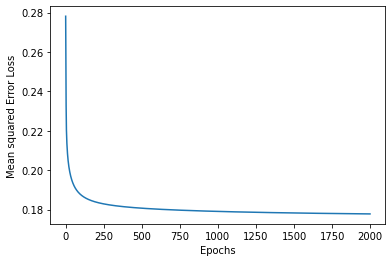

In [ ]:
f1 = FFNetwork2()
f1.train(X_train,Y_train,epochs=2000, lr=0.01, initialise=1, show_loss=1)

#Training the model with given data and plotting loss


In [ ]:
Y_pred_train = f1.predict(X_train)
Y_pred_test= f1.predict(X_test)

Y_binarised_train_pred_temp =[]
for y in Y_pred_train:
  y_temp = 0 if y< 0.5 else 1
  Y_binarised_train_pred_temp.append(y_temp)
Y_binarised_train_pred = np.asarray(Y_binarised_train_pred_temp)

Y_binarised_test_temp_pred =[]
for y in Y_pred_test:
  y_temp = 0 if y< 0.5 else 1
  Y_binarised_test_temp_pred.append(y_temp)
Y_binarised_test_pred = np.asarray(Y_binarised_test_temp_pred)

accuracy_train = accuracy_score(Y_binarised_train_pred, Y_train)
accuracy_test = accuracy_score(Y_binarised_test_pred, Y_test)
print(accuracy_train,accuracy_test)

#Predicting the output for test and training data
#Converting output to binarised form with threshold = 0.5
#Finally taking the training and the test accuracy, much higher than sigmoid neuron

0.7346666666666667 0.716


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


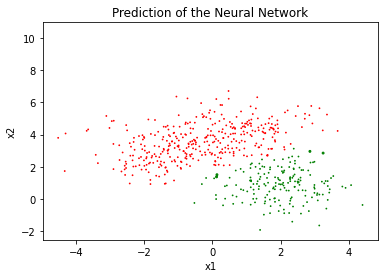

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_binarised_train_pred, cmap = cmap1, s = 3*((Y_binarised_train_pred - Y_train)+0.2))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Prediction of the Neural Network')
plt.show()

#Here there are much fewer large points since most predictions are correct
#The model has more parameters hence it is able to accuractely predict 
#This can also be seen with much higher accuracy

#FeedForward Network General Class
Here we'll write a generalized class for a FeedForward Network which takes in the number of inputs, number of hidden layers and the total number of neurons in each layer from the user. However, the output layer would consist of a single neuron only since we are still dealing with binary classification.

In [ ]:
#General Class for FeedForward Network

class GNFFNetwork:

  def __init__(self, n_inputs, hidden_sizes = [2]):
    self.nx = n_inputs 
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]

    self.W = {}
    self.B = {}
    for i in range(self.nh + 1):
      self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
      self.B[i+1] = np.zeros([1,self.sizes[i+1]])
  
  def model(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1,-1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i],self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.model(self.A[i+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def train(self,X,Y,epochs =1, lr= 1,initialise = 1, show_loss=0):
    loss = []
    if initialise ==1:
      self.W = {}
      self.B = {}
      for i in range(self.nh + 1):
        self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
        self.B[i+1] = np.zeros([1,self.sizes[i+1]])
    
    for j in tqdm_notebook(range(epochs)):
      dW = {}
      dB = {}
      for i in range(self.nh +1):
        dW[i+1] = np.zeros([self.sizes[i],self.sizes[i+1]])
        dB[i+1] = np.zeros([1,self.sizes[i+1]])
      for x,y in zip(X,Y):
        self.grad(x,y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
      
      m = X.shape[1]

      for i in range(self.nh +1):
        self.W[i+1] -= lr * dW[i+1] /m
        self.B[i+1] -= lr * dB[i+1] /m
      
      Y_pred = self.predict(X)
      loss.append(mean_squared_error(Y_pred,Y))  
    
    if show_loss ==1:
      plt.plot(loss)
      plt.ylabel('Mean Squared Error')
      plt.xlabel('Epochs')
      plt.show()
    
  def predict(self,X):
    Y_pred_temp = []
    for x in X:
      Y_pred_temp.append(self.forward_pass(x))
    Y_pred = np.asarray(Y_pred_temp).squeeze()

    return Y_pred
    
#We have an initial function which takes as inputs number of x values and a list with no of neurons in each layer
#This is followed by an initialisation where W and B are dictionaries and each entry contains values for one layer
#The forward pass function calculates the output for given x and w,b
#Each initialisation or calculation contains a loop for each dictionary entry
#The train function initialises first, then takes dictionaries for dW and dB all set to 0
#Then for each x value grad is called and with a loop dW is increased with self.dW
#Then with a loop the values of self.W are incremented for each entry 
#With these values the output and loss are calculated, and a list is made for each epoch value
#Loss is plotted as usual

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


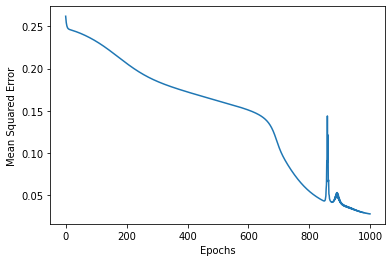

In [ ]:
f1 = GNFFNetwork(2,[2,3])
f1.train(X_train,Y_train,epochs= 1000, lr = 0.001, initialise =1,show_loss=1)

#Training the data for X_train and Y_train

In [ ]:
Y_pred_train = f1.predict(X_train)
Y_pred_test= f1.predict(X_test)

Y_binarised_train_pred_temp =[]
for y in Y_pred_train:
  y_temp = 0 if y< 0.5 else 1
  Y_binarised_train_pred_temp.append(y_temp)
Y_binarised_train_pred = np.asarray(Y_binarised_train_pred_temp)

Y_binarised_test_temp_pred =[]
for y in Y_pred_test:
  y_temp = 0 if y< 0.5 else 1
  Y_binarised_test_temp_pred.append(y_temp)
Y_binarised_test_pred = np.asarray(Y_binarised_test_temp_pred)

accuracy_train = accuracy_score(Y_binarised_train_pred, Y_train)
accuracy_test = accuracy_score(Y_binarised_test_pred, Y_test)
print(accuracy_train,accuracy_test)

#Predicting the output for test and training data
#Converting output to binarised form with threshold = 0.5
#Finally taking the training and the test accuracy, similar to the other network

0.972 0.944


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


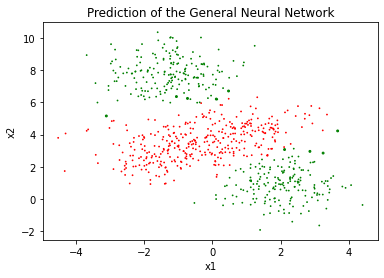

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c = Y_binarised_train_pred, cmap = cmap1, s = 3*((Y_binarised_train_pred - Y_train)+0.2))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Prediction of the General Neural Network')
plt.show()

#Plotting the output and showing the incorrect predictions

#Multi Class Classification with FeedForward Neural Network
In most cases real life data requires multi ckass classification which can also be done with our Generalized Feed Forward Network by making a few modifications, explained below

In [ ]:
data, labels = make_blobs(n_samples =1000, n_features =2, centers = 4, random_state=0)

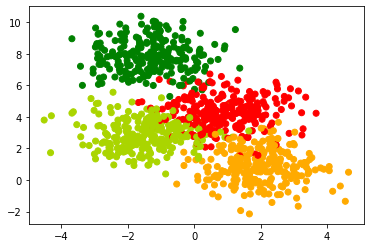

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=cmap1)
plt.show()

#For Multiclass classification, our training data needs to be in 4 categories
#We can use our initial data generated with make_blobs

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

#Dividing the data into test and train data as usual
#We will stratify acc to labels original to ensure all 4 classes are equally divided

(750, 2) (250, 2) (750,) (250,)


In [ ]:
Y_train1 = Y_train.reshape(-1,1)
onehotencoder = OneHotEncoder() 
Y_train2 = onehotencoder.fit_transform(Y_train1).toarray()

#This section of code converts the data into one hot encoded form 
#Class 0 is represented by [1,0,0,0]
#Class 1 is represented by [0,1,0,0]
#Class 2 is represented by [0,0,1,0]
#Class 3 is represented by [0,0,0,1]
#OneHotEncoder takes only 2D arrays hence reshape is used
#fit_transform then converts the given data into required form
#Result is array (matrix) with 4 columns 

Y_test1 = Y_test.reshape(-1,1)
onehotencoder = OneHotEncoder() 
Y_test2 = onehotencoder.fit_transform(Y_test1).toarray()

#Similar method for Y_test

In [ ]:
#class for Multi class classification with Feedforward Neural Network
#We will modify the general class made earlier 

class GNFFNetwork_MC:

  def __init__(self, n_inputs, n_outputs, hidden_sizes = [2]):
    self.nx = n_inputs 
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]

    self.W = {}
    self.B = {}
    for i in range(self.nh + 1):
      self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
      self.B[i+1] = np.zeros([1,self.sizes[i+1]])
  
  def model(self,x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self,x):
    return np.exp(x)/(np.sum(np.exp(x)))

  def predict(self,X):
    Y_pred_temp = []
    for x in X:
      Y_pred_temp.append(self.forward_pass(x))
    Y_pred = np.asarray(Y_pred_temp).squeeze()
    return Y_pred
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1,-1)
    for i in range(self.nh):
      self.A[i+1] = np.matmul(self.H[i],self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.model(self.A[i+1])
    self.A[self.nh +1] = np.matmul(self.H[self.nh],self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh +1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def cross_entropy(self,Y,Y_pred):
    y_temp = np.multiply(Y,Y_pred)
    y_temp = y_temp[y_temp != 0]
    y_temp1 = -np.log(y_temp)
    return np.mean(y_temp1)
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 
    
    
  def train(self,X,Y,epochs =1, lr= 1,initialise = 1, show_loss=0):
    loss = []
    if initialise ==1:
      self.W = {}
      self.B = {}
      for i in range(self.nh + 1):
        self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
        self.B[i+1] = np.zeros([1,self.sizes[i+1]])
    
    for j in tqdm_notebook(range(epochs)):
      dW = {}
      dB = {}
      for i in range(self.nh +1):
        dW[i+1] = np.zeros([self.sizes[i],self.sizes[i+1]])
        dB[i+1] = np.zeros([1,self.sizes[i+1]])
      for x,y in zip(X,Y):
        self.grad(x,y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
      
      m = X.shape[1]

      for i in range(self.nh +1):
        self.W[i+1] -= lr * dW[i+1] /m
        self.B[i+1] -= lr * dB[i+1] /m
      
      Y_pred = self.predict(X)
      loss.append(self.cross_entropy(Y,Y_pred))  
    
    if show_loss ==1:
      plt.plot(loss)
      plt.ylabel('Cross Entropy Loss')
      plt.xlabel('Epochs')
      plt.show()
    

#FOR GENERAL CLASS BINARY CLASSIFICATION   
#We have an initial function which takes as inputs number of x values and a list with no of neurons in each layer
#This is followed by an initialisation where W and B are dictionaries and each entry contains values for one layer
#The forward pass function calculates the output for given x and w,b
#Each initialisation or calculation contains a loop for each dictionary entry
#The train function initialises first, then takes dictionaries for dW and dB all set to 0
#Then for each x value grad is called and with a loop dW is increased with self.dW
#Then with a loop the values of self.W are incremented for each entry 
#With these values the output and loss are calculated, and a list is made for each epoch value
#Loss is plotted as usual

#FOR MULTICLASS CLASSIFICATION 
#Initial function takes one more input, number of classes or neurons in the output layer
#New softmax function which returns exp value/sum of all exp values for probability distribution
#In the forward pass function, the final layer is calculated outside the loop and the softmax function is called 
#Cross entropy loss function is introduced which takes element wise product of the actual and predicted data
#Log function is then used, ensuring no zeros are present


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


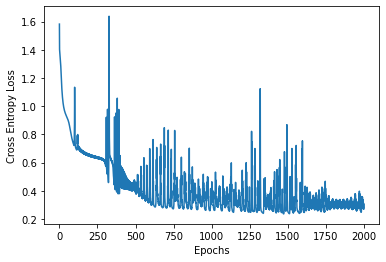

In [ ]:
f1= GNFFNetwork_MC(2,4,[2,3])
f1.train(X_train,Y_train2,epochs =2000, lr=0.005,initialise=1,show_loss=1)

#Training on data as usual

In [ ]:
Y_pred_train1 = f1.predict(X_train)
Y_pred_test1 = f1.predict(X_test)

Y_pred_train = np.argmax(Y_pred_train1,axis=1)
Y_pred_test = np.argmax(Y_pred_test1,axis =1)

#This is done to reverse the data from one hot encoded form, the index of the max value is taken 
#Now the output consists of only one column

train_accuracy = accuracy_score(Y_pred_train,Y_train)
test_accuracy = accuracy_score(Y_pred_test,Y_test)

print(train_accuracy,test_accuracy)

#Checking for accuracy

0.9053333333333333 0.884


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


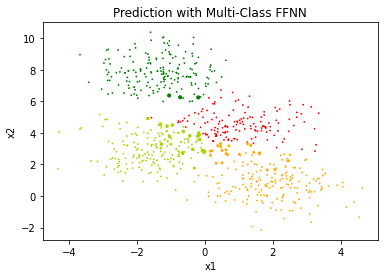

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c= Y_pred_train, cmap=cmap1,s = 3*((Y_pred_train-Y_train)+0.2))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Prediction with Multi-Class FFNN')
plt.show()

#Plotting as usual 
#Small points show that our network is able to predict on multi class data

#Exercises
Some other datasets we can use feedforward Neural Networks with  

In [ ]:
from sklearn.datasets import make_moons, make_circles

In [ ]:
data,labels = make_moons(n_samples=1000,shuffle=False,noise=0.2,random_state=1)
#We'll generate cresent moon shaped data here 

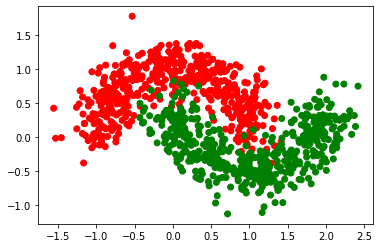

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=cmap1)
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=0)

#Splitting for train test 

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(750, 2) (250, 2) (750,) (250,)


In [ ]:
f2 = GNFFNetwork(2,[3,3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


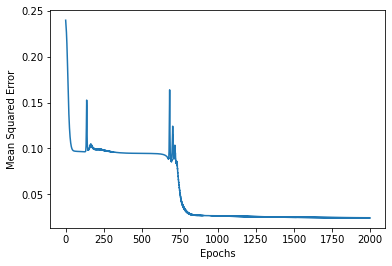

In [ ]:
f2.train(X_train,Y_train,epochs=2000,lr=0.01,initialise=1,show_loss=1)

#Model training

In [ ]:
Y_pred_train = f2.predict(X_train)
Y_pred_test= f2.predict(X_test)

Y_binarised_train_pred_temp =[]
for y in Y_pred_train:
  y_temp = 0 if y< 0.5 else 1
  Y_binarised_train_pred_temp.append(y_temp)
Y_binarised_train_pred = np.asarray(Y_binarised_train_pred_temp)

Y_binarised_test_temp_pred =[]
for y in Y_pred_test:
  y_temp = 0 if y< 0.5 else 1
  Y_binarised_test_temp_pred.append(y_temp)
Y_binarised_test_pred = np.asarray(Y_binarised_test_temp_pred)

accuracy_train = accuracy_score(Y_binarised_train_pred, Y_train)
accuracy_test = accuracy_score(Y_binarised_test_pred, Y_test)
print(accuracy_train,accuracy_test)

#Taking output, converting to binarised and calculating accuracy for train and test data 

0.9693333333333334 0.976


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


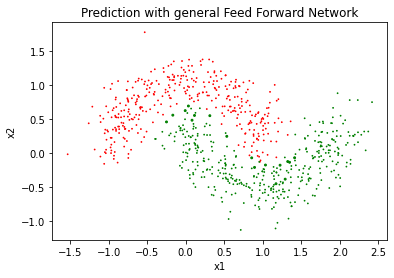

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_binarised_train_pred,cmap=cmap1,s = 3*((Y_binarised_train_pred-Y_train)+0.2))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Prediction with general Feed Forward Network')
plt.show()

#Plotting output showing incorrect points 
#Our model is  able to classify correctly

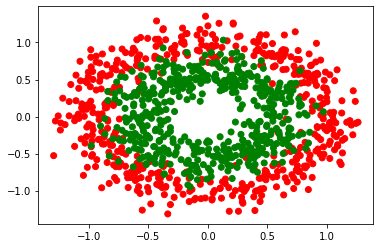

In [ ]:
data,labels = make_circles(n_samples=1000,shuffle=False,noise=0.15,random_state=1,factor=0.6)
plt.scatter(data[:,0],data[:,1],c=labels,cmap=cmap1)
plt.show()

#Generating circular shaped data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=1)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

#Splitting into test and training data 

(750, 2) (750,) (250, 2) (250,)


In [ ]:
f3 = GNFFNetwork(2,[3,3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


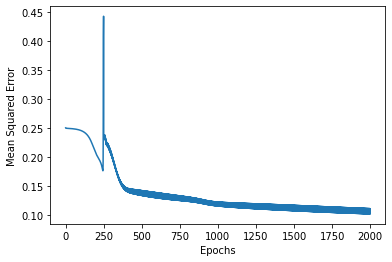

In [ ]:
f3.train(X_train,Y_train,epochs=2000,lr=0.01,initialise=1,show_loss=1)

#Model training 

In [ ]:
Y_pred_train = f3.predict(X_train)
Y_pred_test= f3.predict(X_test)

Y_binarised_train_pred_temp =[]
for y in Y_pred_train:
  y_temp = 0 if y< 0.5 else 1
  Y_binarised_train_pred_temp.append(y_temp)
Y_binarised_train_pred = np.asarray(Y_binarised_train_pred_temp)

Y_binarised_test_temp_pred =[]
for y in Y_pred_test:
  y_temp = 0 if y< 0.5 else 1
  Y_binarised_test_temp_pred.append(y_temp)
Y_binarised_test_pred = np.asarray(Y_binarised_test_temp_pred)

accuracy_train = accuracy_score(Y_binarised_train_pred, Y_train)
accuracy_test = accuracy_score(Y_binarised_test_pred, Y_test)
print(accuracy_train,accuracy_test)

#Prediction, Binarisation and accuracy testing 

0.8693333333333333 0.864


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


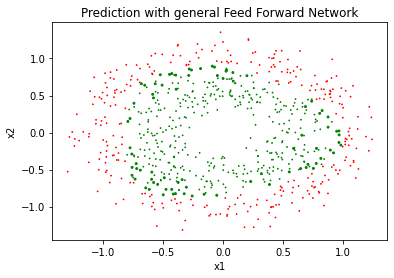

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_binarised_train_pred,cmap=cmap1,s = 3*((Y_binarised_train_pred-Y_train)+0.2))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Prediction with general Feed Forward Network')
plt.show()

#Final Plotting 

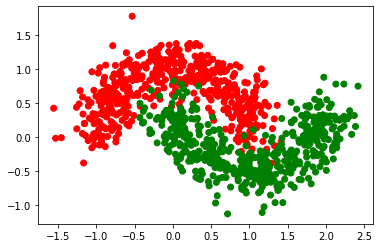

In [ ]:
data,labels = make_moons(n_samples=1000,shuffle=False,noise=0.2,random_state=1)
plt.scatter(data[:,0],data[:,1],c=labels,cmap=cmap1)
plt.show()

#Generating data for the MultiClass classification
#Plotting the data 

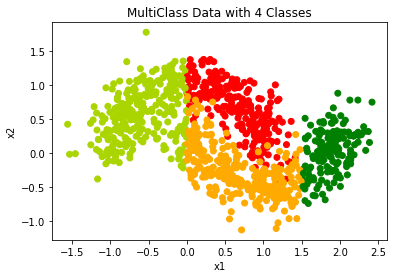

In [ ]:
Y = np.ndarray.tolist(labels)
Z = []
for i in range(1000):
  if data[i][0] <= 0:
    Z.append(2)
  elif data[i][0] >= 1.5:
    Z.append(3)
  else:
    Z.append(Y[i])

Z1 = np.asarray(Z)
plt.scatter(data[:,0],data[:,1],c=Z1,cmap=cmap1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('MultiClass Data with 4 Classes')
plt.show()

#Converting from 2 to 4 classes
#If the value of x1 in all the points is below 0, it is moved to class 2
#If the value of x1 in all the points is above 1.5, it is moved to class 3
#Else the value stays the same as it was in Binary classification 
#Finally the data is plotted for verification and it is seen that we have 4 classes now
#Shape of the data stays the same 

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,Z1,stratify=Z1,random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

#Splitting the data as usual into test and training data
#Stratify according to the 4 class data

(750, 2) (250, 2) (750,) (250,)


In [ ]:
Y_train1 = onehotencoder.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_test1 = onehotencoder.fit_transform(Y_test.reshape(-1,1)).toarray()
print(Y_train1.shape,Y_test1.shape)

#One hot encoding is used as the final treatment of the data
#Now we are ready for training the data with General Multi Class Neural Network 

(750, 4) (250, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


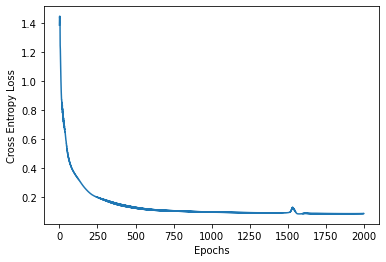

In [ ]:
f3 = GNFFNetwork_MC(2,4,[4,4])
f3.train(X_train,Y_train1,epochs=2000,lr=0.01,initialise=1,show_loss=1)

#Training the data as usual

In [ ]:
Y_pred_train1 = f3.predict(X_train)
Y_pred_test1 = f3.predict(X_test)

Y_pred_train = np.argmax(Y_pred_train1,axis=1)
Y_pred_test = np.argmax(Y_pred_test1,axis =1)

#This is done to reverse the data from one hot encoded form, the index of the max value is taken 
#Now the output consists of only one column

train_accuracy = accuracy_score(Y_pred_train,Y_train)
test_accuracy = accuracy_score(Y_pred_test,Y_test)

print(train_accuracy,test_accuracy)

#Predicting the results on the testing and training data
#Converting back from one hot encoded form and calculating accuracy

0.9666666666666667 0.968


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


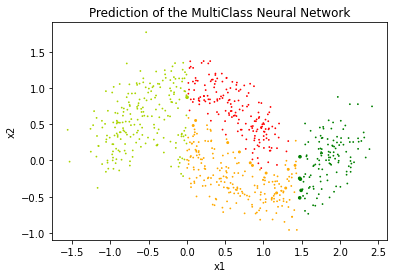

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_train,cmap=cmap1,s = 3*((Y_pred_train-Y_train)+0.2))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Prediction of the MultiClass Neural Network')
plt.show()

#Final plotting of the data 

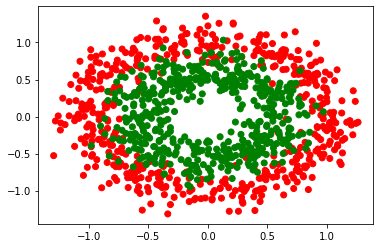

In [ ]:
data,labels = make_circles(n_samples=1000,shuffle=False,noise=0.15,random_state=1,factor=0.6)
plt.scatter(data[:,0],data[:,1],c=labels,cmap=cmap1)
plt.show()


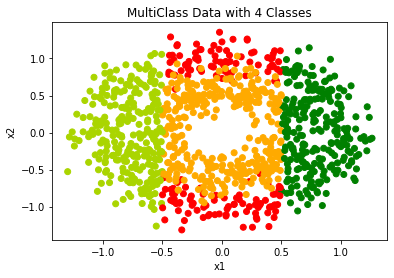

In [ ]:
Y = np.ndarray.tolist(labels)
Z = []
for i in range(1000):
  if data[i][0] <= -0.5:
    Z.append(2)
  elif data[i][0] >= 0.5:
    Z.append(3)
  else:
    Z.append(Y[i])

Z1 = np.asarray(Z)
plt.scatter(data[:,0],data[:,1],c=Z1,cmap=cmap1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('MultiClass Data with 4 Classes')
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(data,Z1,stratify=Z1,random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(750, 2) (250, 2) (750,) (250,)


In [ ]:
Y_train1 = onehotencoder.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_test1 = onehotencoder.fit_transform(Y_test.reshape(-1,1)).toarray()
print(Y_train1.shape,Y_test1.shape)

(750, 4) (250, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


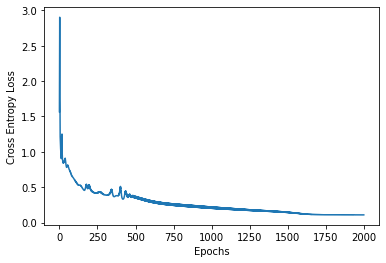

In [ ]:
f4 = GNFFNetwork_MC(2,4,[5,5])
f4.train(X_train,Y_train1,epochs=2000,lr=0.01,initialise=1,show_loss=1)

In [ ]:
Y_pred_train1 = f4.predict(X_train)
Y_pred_test1 = f4.predict(X_test)

Y_pred_train = np.argmax(Y_pred_train1,axis=1)
Y_pred_test = np.argmax(Y_pred_test1,axis =1)

#This is done to reverse the data from one hot encoded form, the index of the max value is taken 
#Now the output consists of only one column

train_accuracy = accuracy_score(Y_pred_train,Y_train)
test_accuracy = accuracy_score(Y_pred_test,Y_test)

print(train_accuracy,test_accuracy)

#Predicting the results on the testing and training data
#Converting back from one hot encoded form and calculating accuracy

0.956 0.944


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


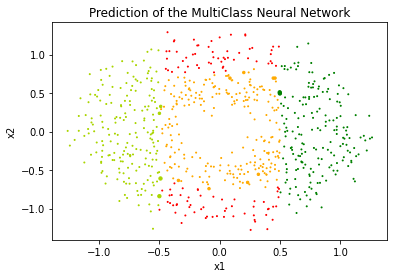

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_train,cmap=cmap1,s = 5*((Y_pred_train-Y_train)+0.2))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Prediction of the MultiClass Neural Network')
plt.show()

#Final plotting of the data 